# Aprendizaje Supervisado - Clasificación

Se utiliza el dataset Iris para explorar un caso de clasificación. Se exploran los modelos de Árbol de decisión y KNN.

In [ ]:
# Método paso a paso
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [52]:
# guardar el dataset 
# load_iris()

# Tipo
# type(load_iris())

# atributos del dataset:
# dir(load_iris())

dir(load_iris())

# Más información
#print("data keys: ", iris.keys())
#print("\nfeature_names: ", iris.feature_names)
#print("target_names: ", iris.target_names)
#print("\nDESCR: \n", iris.DESCR)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
# Opción 1 para forma de sacar el dataset
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [54]:
# Opción 2: Esto es para nombrar de forma apropiada las columnas del Dataset
data = sns.load_dataset('iris')
data = pd.DataFrame(data=iris.data, columns=iris['feature_names'])
data['target'] = iris['target']
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
data1.shape

(150, 5)

In [56]:
# Ver balance de datos
data.groupby(by=["target"]).count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


In [57]:
# Ahora separación del dataframe de algunos atributos
# 1. Definición de variables predictoras y variable a predecir

X = data[['petal length (cm)', 'petal width (cm)']]
#X = data[['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']]
y = data.target
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [58]:
# 2. Separación de datos
# En este caso no se hace

# 3. Instanciar modelo
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0,
#                       random_state=42, splitter='best')

In [59]:
# 4. Entrenar modelo
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [60]:
# Explorar algunas características del modelo
#print(clf.classes_)
#print(clf.n_classes_)
#print(clf.max_features_)
#print(clf.feature_importances_)

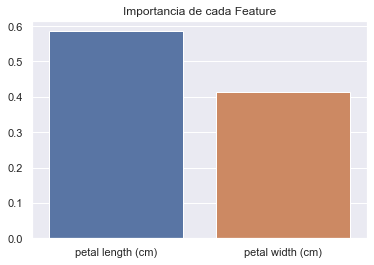

In [61]:
importances = clf.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

In [62]:
# 5. Predecir
y_pred = clf.predict(X)

In [63]:
# 6. Evaluar (accuracy y matriz de confusión)

from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y,y_pred))

0.9733333333333334


In [64]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

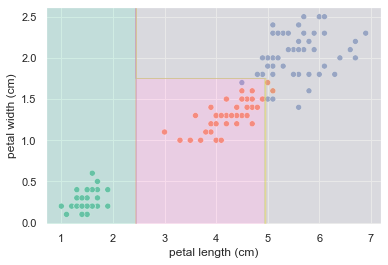

In [65]:
# Visualizar fronteras de decisión obtenidas

plt.figure()
ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=y.values, palette='Set2')
plt.legend().remove()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

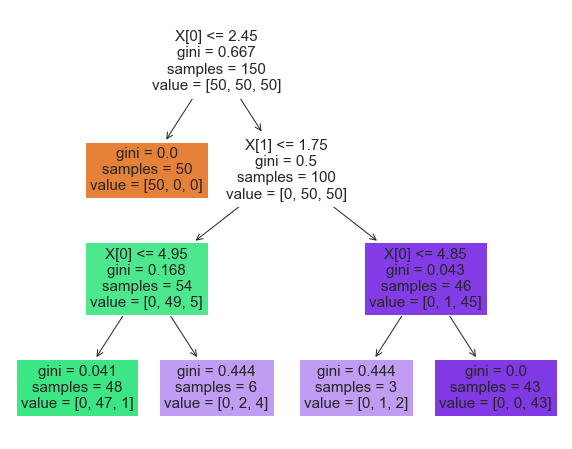

In [66]:
# Visualizar árbol
from sklearn import tree

plt.figure(figsize = (10,8))
tree.plot_tree(clf, filled = True)
plt.show()

## Método directo con datos de scikit-learn

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf = clf.fit(iris.data[:,2:], iris.target)
y_pred = clf.predict(iris.data[:,2:])
print(accuracy_score(iris.target,y_pred))

0.9733333333333334


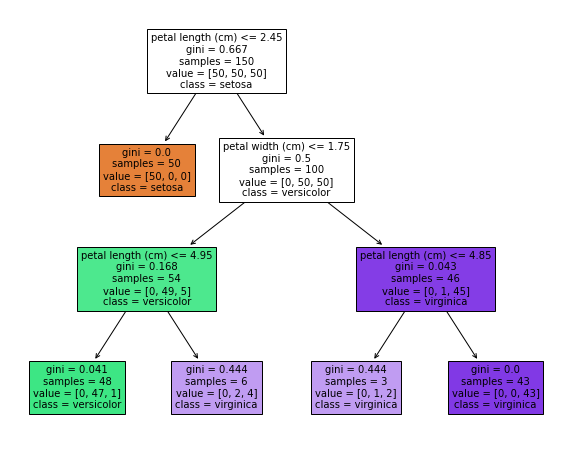

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
tree.plot_tree(clf, 
               feature_names = iris.feature_names[2:], 
               class_names = iris.target_names,
               filled = True)
plt.show()

In [3]:
# Ahora la predicción sin Train Test Split, pero ahora con modelo KNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# 1. Variables predictoras y variables a predecir
X = data[['petal length (cm)', 'petal width (cm)']]
y = data.target

In [6]:
# 2. Separación de datos
# En este caso no se hace

# 3. Instanciar modelo
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=18)

In [7]:
# 4. Entrenar el modelo
clf_knn.fit(X,y)

#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
#                     weights='uniform')

KNeighborsClassifier(n_neighbors=18)

In [8]:
# 5. Predecir
y_pred = clf_knn.predict(X)

In [9]:
# 6. Evaluar
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y,y_pred))

0.96


In [10]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

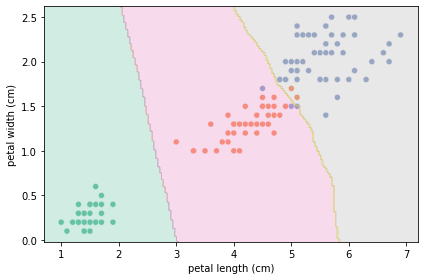

In [11]:
plt.figure()
ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=y.values, palette='Set2')
plt.legend().remove()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.show()

In [12]:
# Qué pasa si agregamos más features

# 1. Variables predictoras y variable a predecir 
X = data[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data.target
# 2. Separación de datos (no se hace)
# 3. Instanciar el modelo
clf_knn2 = KNeighborsClassifier(n_neighbors=18)
# 4. Entrenar el modelo
clf_knn2.fit(X,y)
# 5. Predecir
y_pred2 = clf_knn2.predict(X)
# 6. Evaluar
print(accuracy_score(y,y_pred2))
confusion_matrix(y, y_pred2)

0.9733333333333334


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

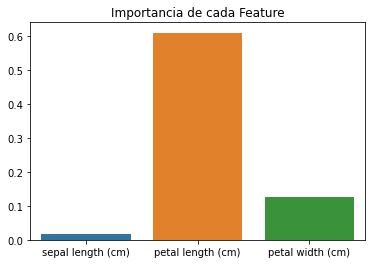

In [13]:
from sklearn.inspection import permutation_importance

results2 = permutation_importance(clf_knn2, X, y, scoring='accuracy')
importance2 = results2.importances_mean
columns = X.columns
sns.barplot(columns, importance2)
plt.title('Importancia de cada Feature')
plt.show()

In [14]:
# Agregando un feature más
# 1. Variables predictoras y variable a predecir 
X = data[['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
y = data.target
# 2. Separación de datos (no se hace)
# 3. Instanciar el modelo
clf_knn3 = KNeighborsClassifier(n_neighbors=18)
# 4. Entrenar el modelo
clf_knn3.fit(X,y)
# 5. Predecir
y_pred3 = clf_knn3.predict(X)
# 6. Evaluar
print(accuracy_score(y,y_pred3))
confusion_matrix(y, y_pred3)

0.9733333333333334


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]], dtype=int64)

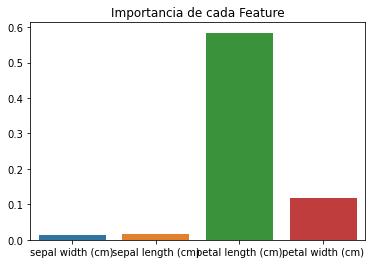

In [15]:
from sklearn.inspection import permutation_importance

results3 = permutation_importance(clf_knn3, X, y, scoring='accuracy')
importance3 = results3.importances_mean
columns = X.columns
sns.barplot(columns, importance3)
plt.title('Importancia de cada Feature')
plt.show()

### Veamos KNN con Train Test Split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# 1. Variables predictoras y variable a predecir 
# X = data[['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']]
X = data.drop('target',axis=1)
y = data.target

In [4]:
# 2. Separación de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size = 0.30, stratify=y, random_state=42)

# Random state hace las veces de semilla. sostiene la misma muestra aleatoria. Reproducibilidad.

X_train.shape

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
98,5.1,2.5,3.0,1.1
68,6.2,2.2,4.5,1.5
19,5.1,3.8,1.5,0.3
143,6.8,3.2,5.9,2.3
99,5.7,2.8,4.1,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
79,5.7,2.6,3.5,1.0
33,5.5,4.2,1.4,0.2
94,5.6,2.7,4.2,1.3


In [5]:
y_train.value_counts()
# Estos valores van a estar en función del test_size. Notar que la muestra es de datos balanceados

0.0    35
2.0    35
1.0    35
Name: target, dtype: int64

In [6]:
# 3. Instanciar el modelo
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 18
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [7]:
# 4. Entrenar el modelo
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [8]:
# 5. Predecir
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

In [9]:
# 6. Evaluar
from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('Accuracy en set de entrenamiento ',train_acc)
print('Accuracy en set de evaluación ',test_acc)

Accuracy en set de entrenamiento  0.9523809523809523
Accuracy en set de evaluación  0.9555555555555556


In [10]:
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  0],
       [ 0, 33,  2],
       [ 0,  3, 32]], dtype=int64)

In [11]:
confusion_matrix(y_test, y_test_pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

## Optimización de hiperparámetros

**Para investigar:**

1. ¿Qué ocurre con el desempeño del modelo con número de vecinos igual a 1?
2. ¿Qué ocurre con el desempeño del modelo con un número de vecinos grande (del orden del tamaño del dataset?
3. ¿Cuál será el número óptimo de vecinos para este modelo?¿Cómo se puede identificar?


### Encontrando el mejor hiperparámetro

Durante el entrenamiento, el modelo ajusta ciertas características intrínsecas que son los parámetros. Ejemplo: un árbol de decisión debe decidir automáticamente con qué umbrales comparar ciertos atributos en cada nodo. Por otra parte, los **hiperparámetros** son características que generalmente se le entregan al modelo; por ejemplo: la profundidad del árbol o el número de vecinos. Optimización de hiperparámetros se trata de buscar el argumento de entrada que maximiza el performance del modelo. Hay técnicas (con diferentes grados de automatización) para hacerlo. Además, la optimización está fuertemente relacionada con la evaluación del modelo: siempre se optimiza hiperparámetros en función a cierta métrica. Esta métrica se define en función del problema (necesidades y posibilidades).
 
La variación de hiperparámetros también tiene relación con la complejidad del modelo, el overfitting y el underfitting. Ejemplo: un árbol de decisión de profundidad 1 es mucho más sencillo que uno de profundidad 10. En el primer caso, el modelo tiende a estar subajustado, mientras que en el segundo, sobreajustado.

A continuación se revisa una optimización de un sólo hiperparámetro. Es una buena opción es probar con muchos posibles valores del hiperparámetro, y graficar su desempeño en función de estos valores. Estas curvas se llaman curvas de validación. También existe la opción de hacerlas automáticamente desde Scikit-Learn.

### Se usa KNN para construir la visualización de las curvas

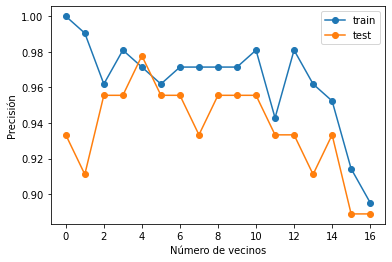

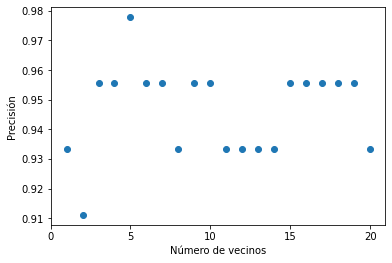

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

X = data.drop('target',axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y ,
                                                    test_size = 0.30, stratify=y, random_state=42)

lista_accuracy_train = []
lista_accuracy_test = []
k_rango = range(1, 21)
puntuacion = []

# Lista de valores de k que se van a revisar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Loop sobre los distintos valores de k 
for k in k_vecinos:
    # 3. Instanciar
    clf_knn = KNeighborsClassifier(n_neighbors= k)
    # 4. Entrenar
    clf_knn.fit(X_train, y_train)
    # 5. Predecir y 6. Evaluar en train
    y_train_pred = clf_knn.predict(X_train)
    train_acc = accuracy_score(y_train_pred, y_train)
    # 5. Predecir y 6. Evaluar en test
    y_test_pred = clf_knn.predict(X_test)
    test_acc = accuracy_score(y_test_pred, y_test)
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    
for k in k_rango:
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(X_train, y_train)
    puntuacion.append(clf_knn.score(X_test, y_test))

plt.plot(lista_accuracy_train,'o-',label='train' )
plt.plot(lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')

plt.figure()
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')
plt.scatter(k_rango, puntuacion)
plt.xticks([0,5,10,15,20]);

### Visualización del ajuste para distintos valores de vecinos

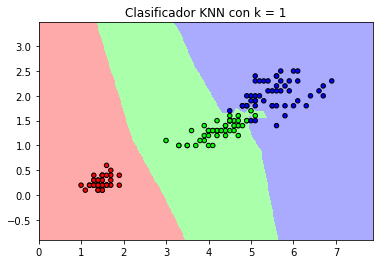

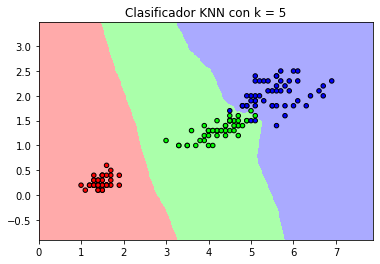

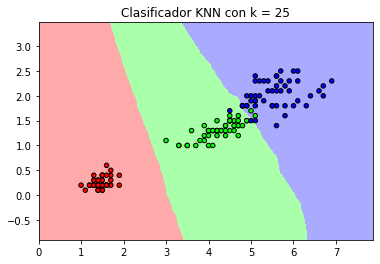

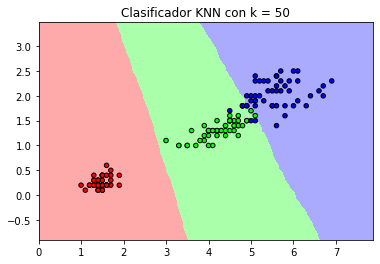

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
X = data[['petal length (cm)', 'petal width (cm)']].values

y = data.target
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1,5,25,50]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador KNN con k = %i"% (k))